In [3]:
!pip3 install texthero
!pip3 install wordcloud
!pip3 install contractions
!pip3 install -U spacy
!pip3 install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 9.1 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528017 sha256=020e26279b2f7bc37c64679e5eb1e92f3c71ae3a68c0fdd53e56903d190d4af6
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
import texthero as hero 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from collections import Counter
import contractions

nltk.download('stopwords')
nltk.download("wordnet")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
lemma = WordNetLemmatizer()

In [6]:
data = pd.read_csv('dataset.csv', encoding='ISO-8859-1')


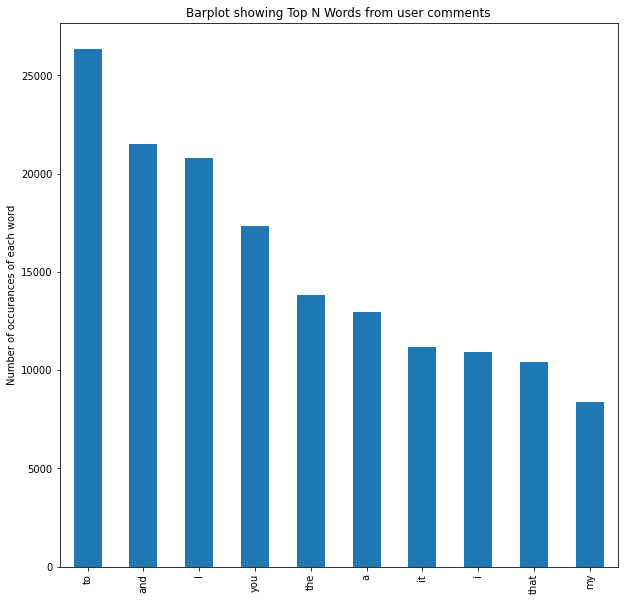

In [7]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

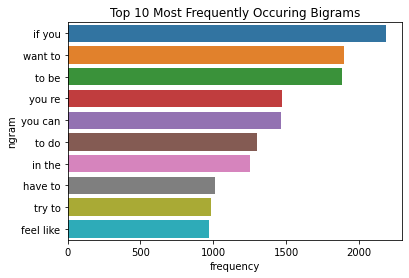

In [8]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [9]:

def clean_text(text):
     # Remove anything that comes after "@"
    text = re.sub(r'@.*$#', '', text)
     # Keep only letters, numbers, and grammatical marks
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z0-9\s\.\?\!,]', '', text)
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

 # Apply the clean_text function to the "text" column of the dataset
data['Content'] = data['Content'].apply(clean_text)

 # Delete certain columns and the first row of data
columns_to_delete = ['ID', 'AuthorID', 'Author', 'Date', 'Words']
data = data.drop(columns=columns_to_delete)
# delete first row
data = data.iloc[1:]

for column in data.columns:
    if column != 'Content':
       data[column] = data[column].replace({'N': 0, 'Y': 1})
        
# Convert all non-"Contents" columns to integers
for column in data.columns:
     if column != 'Content':
         data[column] = pd.to_numeric(data[column], errors='coerce').astype('Int64')
        
# Save the cleaned dataset to a new CSV file
data.to_csv('./cleaned_dataset.csv', index=False)

In [10]:
data.head()

,Content,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
1,"Hello, depressed, selfdeprecating make thing w...",0,0,0,1,0,0,1,0
2,Please note professionals. The community try h...,0,0,0,0,0,0,0,1
3,yeah people want attention actually listen peo...,0,0,0,0,0,0,0,1
4,Just small vent arm hurt much know I need go s...,0,0,0,1,1,1,0,0
5,They I live I call 911 someone pay like 12k,0,0,0,0,0,0,0,1


In [11]:
data = data.rename(columns={'Change in appetite, losing or gaining weight': 'symptom_1'})
data = data.rename(columns={'Sleeping too much or not sleeping well (insomnia)': 'symptom_2'})
data = data.rename(columns={'Fatigue and low energy most days': 'symptom_3'})
data = data.rename(columns={'Feeling worthless, guilty, and hopeless': 'symptom_4'})
data = data.rename(columns={'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school': 'symptom_5'})
data = data.rename(columns={'Movements that are unusually slow or agitated (a change which is often noticeable to others)': 'symptom_6'})
data = data.rename(columns={'Thinking about death and dying; suicidal ideation or suicide attempts': 'symptom_7'})

In [12]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23993 entries, 1 to 23993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23993 non-null  object
 1   symptom_1  23981 non-null  Int64 
 2   symptom_2  23984 non-null  Int64 
 3   symptom_3  23988 non-null  Int64 
 4   symptom_4  23985 non-null  Int64 
 5   symptom_5  23988 non-null  Int64 
 6   symptom_6  23987 non-null  Int64 
 7   symptom_7  23985 non-null  Int64 
 8   None       23980 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


In [27]:
data.drop_duplicates(subset='Content',inplace=True)
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23911 non-null  object
 1   symptom_1  23911 non-null  Int64 
 2   symptom_2  23911 non-null  Int64 
 3   symptom_3  23911 non-null  Int64 
 4   symptom_4  23911 non-null  Int64 
 5   symptom_5  23911 non-null  Int64 
 6   symptom_6  23911 non-null  Int64 
 7   symptom_7  23911 non-null  Int64 
 8   None       23911 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


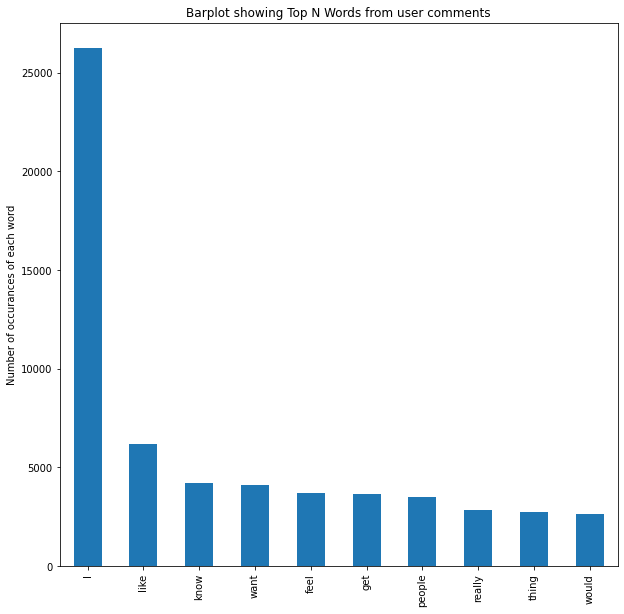

In [28]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

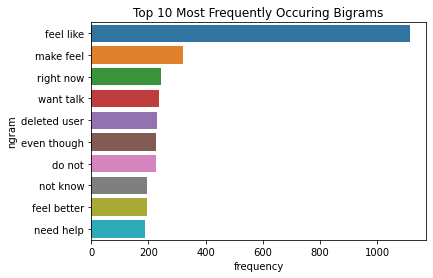

In [29]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

Text(0, 0.5, 'Frequency of Text Length')

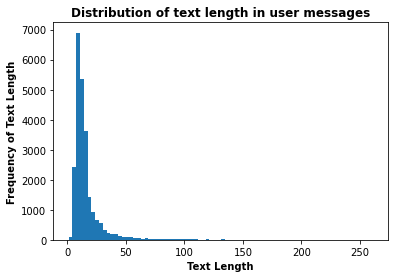

In [30]:
data["Words"] = data["Content"].apply(lambda n: len(n.split()))
data['Words'].plot.hist(bins=80)

plt.title('Distribution of text length in user messages', fontweight='bold')
plt.xlabel("Text Length", fontweight='bold')
plt.ylabel("Frequency of Text Length", fontweight='bold')

Text(0.5, 1.0, 'Wordcloud showing top N words')

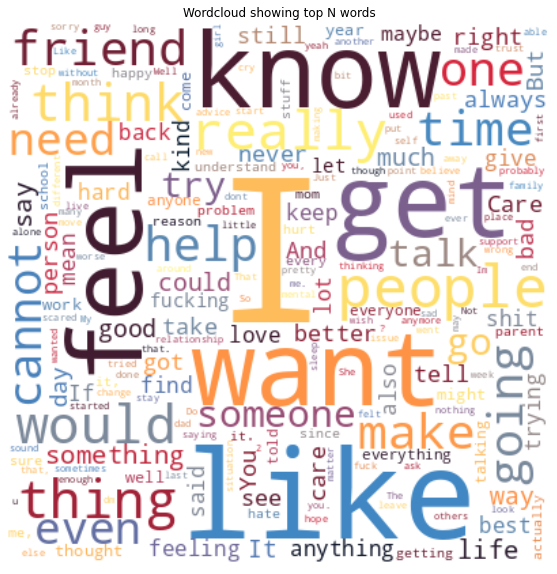

In [31]:
hero.visualization.wordcloud(data['Content'],width = 400, height= 400,background_color='White')
plt.title('Wordcloud showing top N words')

In [32]:
data = data.drop(columns='Words')
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
0,"talk noobie boobie! now, need shower probably ...",0,0,0,0,0,0,0,1
1,would used try nah anymore try suicide kind co...,0,0,0,0,0,0,1,0
2,And I stuck school schedule week I hate waking...,0,0,0,0,0,0,0,1
3,"thinking ending way would also harm people,i a...",0,0,0,0,0,0,1,0
4,Or maybe ditch cuz bad person listening friend...,0,0,0,1,0,0,0,0


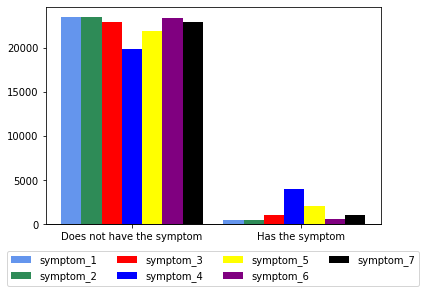

In [33]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0]) / 8.0

ax.bar(d_bins[:-1] + width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1] + width * 2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1] + width * 3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1] + width * 4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1] + width * 5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1] + width * 6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1] + width * 7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0] + width * 4, ss_bins[-1] - width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [34]:
data['powerlabel'] = data.apply(lambda x : 6.4 * x['symptom_1'] + 3.2 * x['symptom_2'] + 1.6*x["symptom_3"] + 0.8 * x['symptom_4'] + 0.4 * x['symptom_5'] + 0.2 * x['symptom_6'] + 0.1 * x['symptom_7'],axis=1)
data.head()


,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None,powerlabel
0,"talk noobie boobie! now, need shower probably ...",0,0,0,0,0,0,0,1,0.0
1,would used try nah anymore try suicide kind co...,0,0,0,0,0,0,1,0,0.1
2,And I stuck school schedule week I hate waking...,0,0,0,0,0,0,0,1,0.0
3,"thinking ending way would also harm people,i a...",0,0,0,0,0,0,1,0,0.1
4,Or maybe ditch cuz bad person listening friend...,0,0,0,1,0,0,0,0,0.8


In [35]:
powercount = {}
powerlabels = np.unique(data['powerlabel'])
for p in powerlabels:
    powercount[p] = np.count_nonzero(data['powerlabel'] == p)

maxcount = int(np.mean(list(powercount.values())))
new_data = pd.DataFrame()
desired_count = int(np.mean(list(powercount.values())))
for p in powerlabels:
    gapnum = maxcount - powercount[p]
    if gapnum <= 0:
        temp_df = data[data['powerlabel'] == p]
    else:
        temp_df = data.iloc[np.random.choice(np.where(data['powerlabel'] == p)[0], size=gapnum, replace=True)]
    
    undersample_num = powercount[p] - maxcount
    if undersample_num <= 0:
        new_data = pd.concat([new_data, temp_df])
    else:
        temp_df = temp_df.sample(n=maxcount, replace=False)
        new_data = pd.concat([new_data, temp_df])
    
data = new_data.sample(frac=1).reset_index(drop=True)


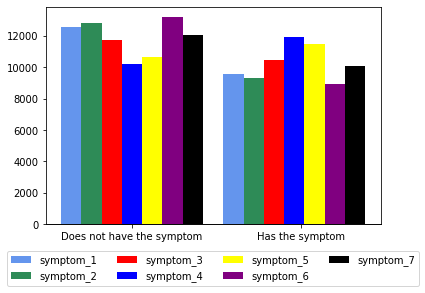

In [36]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0])/8.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1]+width*5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1]+width*6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1]+width*7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0]+width*4, ss_bins[-1]-width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [39]:
!pip3 install transformers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.9 MB/s eta 0:00:00


In [ ]:
# Load the dataset
df = pd.read_csv("./cleaned_dataset.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert labels to tensor
labels = tf.convert_to_tensor(df[['Change in appetite, losing or gaining weight', 'Sleeping too much or not sleeping well (insomnia)', 'Fatigue and low energy most days', 'Feeling worthless, guilty, and hopeless', 'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school', 'Thinking about death and dying; suicidal ideation or suicide attempts', 'None', 'Movements that are unusually slow or agitated (a change which is often noticeable to others)']].values)

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Compile the model for training
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Tokenize input sentences and create attention masks
input_ids = []
attention_masks = []

for sentence in df['Content']:
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=387, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='tf')
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert input_ids and attention_masks to tensors
input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

# Split the data into training and testing sets
input_ids_arr = np.asarray(input_ids)
attention_masks_arr = np.asarray(attention_masks)
labels_arr = np.asarray(labels)
train_input_ids, test_input_ids, train_attention_masks, test_attention_masks, train_labels, test_labels = train_test_split(input_ids_arr, attention_masks_arr, labels_arr, test_size=0.2, random_state=42)

# Train the model or load saved weights
checkpoint_file = 'model_weights.h5'
if tf.io.gfile.exists(checkpoint_file):
    # Load saved weights if the checkpoint file exists
    model.load_weights(checkpoint_file)
else:
    # Train the model and save the weights
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

    history = model.fit([train_input_ids, train_attention_masks], train_labels, epochs=5, batch_size=16, validation_data=([test_input_ids, test_attention_masks], test_labels), callbacks=[early_stopping, checkpoint])
    model.save_weights(checkpoint_file)


In [ ]:
test_loss, test_acc = model.evaluate([test_input_ids, test_attention_masks], test_labels, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)